<a href="https://colab.research.google.com/github/kleeresearch/TextAnalysis/blob/master/Course/Day5/20_LDA_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from collections import defaultdict
# 너무 많이 사용된 단어들이나 너무 적게 사용된 단어들을 제거하기 위한 함수
def get_filtered_words(docs):
    term_fre_dict = defaultdict(int)
    doc_fre_dict = defaultdict(int)

    for doc in docs:
        for word in doc:
            term_fre_dict[word] += 1
        for word in set(doc):
            doc_fre_dict[word] += 1

    max_doc_frequency = 1000
    min_doc_frequency = 3
    max_term_frequency = 7000
    min_term_frequency = 5

    doc_frequency_filtered = {k:v for k, v in doc_fre_dict.items() if ((v>=min_doc_frequency) and (v <= max_doc_frequency))}
    term_frequency_filtered = {k:v for k, v in term_fre_dict.items() if ((v>=min_term_frequency) and (v <= max_term_frequency))}
    both_satisfied = {k:v for k, v in term_frequency_filtered.items() if k in doc_frequency_filtered}

    return both_satisfied

In [ ]:
# 문서별 주제 분포에서 확률이 가장 높은 주제를 출력하기 위한 함수
def get_highest_topic(topic_list):
    highest_topic = 100
    highest_prob = 0
    for topic, prob in topic_list:
        if prob > highest_prob:
            highest_prob = prob
            highest_topic = topic
    return highest_topic, highest_prob

In [ ]:
# 명사 단어를 추출하기 위한 함수
def get_noun_words(morphs):
    Noun_words = []
    for word, tag in morphs:
        if tag == 'Noun':
            Noun_words.append(word)
    return Noun_words

### 데이터 읽어오기

In [ ]:
import pickle
total_morphs = pickle.load(open('total_sections_morphs.p','rb'))
# 정치, 경제, 사회 섹션의 기사
# 사람들이 많이 본 순 하루 30개, 3달 기간

In [ ]:
total_morphs['001-0008403019'].keys()

dict_keys(['text_title', 'paper_id', 'content'])

In [ ]:
len(total_morphs)

7837

 기본적으로 형태소 분석이 되어 있음.

In [ ]:
print(total_morphs['001-0008403019']['content'])

[('[', 'Punctuation'), ('연합뉴스', 'Noun'), ('TV', 'Alpha'), ('제공', 'Noun'), (']', 'Punctuation'), ('공정위', 'Noun'), ('고발', 'Noun'), ('4', 'Number'), ('년', 'Noun'), ('지나서', 'Verb'), ('야', 'Eomi'), ('검찰', 'Noun'), ('수사', 'Noun'), ('본격', 'Noun'), ('화', 'Suffix'), ('…', 'Foreign'), ('왜', 'Noun'), ('"', 'Punctuation'), ('검찰', 'Noun'), ('도', 'Josa'), ('책임', 'Noun'), ('론', 'Noun'), ('서', 'Josa'), ('자유로', 'Adjective'), ('울', 'PreEomi'), ('수', 'Noun'), ('없어', 'Adjective'), ('"', 'Punctuation'), ('지적도', 'Noun'), ('(', 'Punctuation'), ('세종', 'Noun'), ('=', 'Punctuation'), ('연합뉴스', 'Noun'), (')', 'Punctuation'), ('박초롱', 'Noun'), ('기자', 'Noun'), ('=', 'Punctuation'), ('옥시', 'Noun'), ('등', 'Noun'), ('가습기', 'Noun'), ('살균제', 'Noun'), ('제조업체', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('원료', 'Noun'), ('의', 'Josa'), ('유독', 'Noun'), ('성', 'Suffix'), ('을', 'Josa'), ('알', 'Verb'), ('고도', 'Eomi'), ('제품', 'Noun'), ('을', 'Josa'), ('판매', 'Noun'), ('해', 'Josa'), ('온', 'Noun'), ('사실', 'Noun'), ('이', 'Josa'), ('4', '

 여기서 명사의 단어들만 추출. noun이라고만 하는 품사 태그를 가진 단어들만 따로 선별해서 저장한다. get_noun_words

In [ ]:
# 3가지 정보를 별도 리스트 변수에 저장
documents =[]
article_ids = []
text_titles = []
for key in total_morphs:
    documents.append(get_noun_words(total_morphs[key]['content'])) # 명사만 추출
    article_ids.append(total_morphs[key]['paper_id'])
    text_titles.append(total_morphs[key]['text_title'])

In [ ]:
print(documents[0])

['매출', '기준', '천', '개사', '조사', '억대', '연봉', '곳', '서울', '연합뉴스', '옥철', '기자', '매출', '조원', '대기업', '직원', '매출', '천억원', '미만', '중소기업', '직원', '해', '천', '만원', '정도', '더', '버', '것', '이', '기준', '대기업', '평균', '연봉', '천', '만원', '중소기업', '천', '만원', '중소기업', '연봉', '대기업', '수준', '지난해', '국내', '천대', '기업', '중', '직원', '억대', '연봉', '손', '쥐', '여준', '기업', '모두', '곳', '집계', '장기', '불황', '전년', '곳', '대비', '크게', '일', '한국', '만', '기업', '연구소', '소장', '오일', '선', '최근', '년', '매출', '기준', '국내', '천대', '기업', '직원', '평균', '보수', '를', '자료', '지난해', '천대', '기업', '평균', '연봉', '천', '만원', '조사', '월급', '만원', '꼴', '평균', '연봉', '전년', '이번', '조사', '사업', '보고서', '상장', '비상', '장사', '매출', '기준', '분류', '천대', '기업', '가운데', '매출', '액', '순위', '상위', '기업', '직원', '평균', '연봉', '천', '만원', '하위', '기업', '직원', '평균', '연봉', '천', '만원', '천', '만원', '중소기업', '대기업', '인재', '쏠림', '현상', '완화', '조사', '결과', '매출', '조원', '대기업', '직원', '매출', '천억원', '미만', '중소기업', '직원', '평균', '연봉', '천', '만원', '더', '것', '집계', '대기업', '직원', '한해', '천', '만원', '월', '만원', '때', '중소기업', '직원', '천', '만원', '월', '만원', '얘기'

In [ ]:
#불용어 제거 =>  빈도 기준
both_satisfied = get_filtered_words(documents)

불용어를 저장하는 text file 이 있는 것을 확인.

In [ ]:
# 사용자 불용어 사전을 별도 파일로 저장
f_stop = open('stop_words.txt', 'r', encoding='utf-8')
stop_words = [word.strip() for word in f_stop.readlines()]
f_stop.close()

길이가 1인 단어들을 제거.

In [ ]:
# 불용어 제거 => 불용어 사전 + 1음절 단어 + 빈도 기준
docs_filtered = [[term for term in doc if term in both_satisfied and term not in stop_words and len(term)>1] for doc in documents]

In [ ]:
print(docs_filtered[0])

['매출', '개사', '억대', '연봉', '옥철', '매출', '조원', '대기업', '직원', '매출', '천억원', '미만', '중소기업', '직원', '대기업', '평균', '연봉', '중소기업', '중소기업', '연봉', '대기업', '천대', '직원', '억대', '연봉', '여준', '집계', '장기', '불황', '전년', '대비', '크게', '연구소', '소장', '오일', '매출', '천대', '직원', '평균', '보수', '천대', '평균', '연봉', '월급', '평균', '연봉', '전년', '보고서', '상장', '비상', '장사', '매출', '분류', '천대', '매출', '순위', '상위', '직원', '평균', '연봉', '하위', '직원', '평균', '연봉', '중소기업', '대기업', '인재', '쏠림', '현상', '완화', '매출', '조원', '대기업', '직원', '매출', '천억원', '미만', '중소기업', '직원', '평균', '연봉', '집계', '대기업', '직원', '한해', '중소기업', '직원', '얘기', '대기업', '직원', '보수', '치면', '중소기업', '직원', '연봉', '전년', '격차', '약간', '대기업', '중소기업', '임금', '격차', '연구소', '오일', '소장', '매출', '이익', '업종', '달라', '보수', '격차', '현실', '중소기업', '보수', '대기업', '우수', '인재', '대기업', '몰리', '쏠림', '현상', '완화', '작년', '중소기업', '대기업', '연봉', '연봉', '천만원', '단위', '천만원', '평균', '보수', '다음', '천만원', '업종', '별로', '정유', '전기', '화학', '업종', '직원', '평균', '보수', '정유', '단연', '최고', '정유', '평균', '보수', '전년', '정유', '보고서', '평균', '연봉', '추이', '에너지', '작년', '칼텍스', '에쓰오일', '

Dictionary는 고유한 아이디(인덱스번호)를 제공하는 역할.
각각의 문서를 벡터의 형태로 변환하여 표현.
최종적인 dtm을 만든다.
최종 dtm 이라는 변수에 저장이 된다.



In [ ]:
from gensim.corpora import Dictionary
dictionary = Dictionary(docs_filtered)
DTM = []
for doc in docs_filtered:
    bow = dictionary.doc2bow(doc)
    DTM.append(bow)

In [ ]:
print(dictionary.token2id)

{'각각': 0, '개사': 1, '건설': 2, '격차': 3, '고액': 4, '다음': 5, '단연': 6, '단위': 7, '달라': 8, '대기업': 9, '대비': 10, '롯데': 11, '매출': 12, '몰리': 13, '미만': 14, '반면': 15, '별로': 16, '보고서': 17, '보수': 18, '분류': 19, '불황': 20, '비상': 21, '상대': 22, '상위': 23, '상장': 24, '상향': 25, '석유화학': 26, '소장': 27, '수가': 28, '순위': 29, '스톡옵션': 30, '식품': 31, '쏠림': 32, '약간': 33, '얘기': 34, '억대': 35, '업종': 36, '에너지': 37, '에쓰오일': 38, '여준': 39, '연구소': 40, '연봉': 41, '영세': 42, '오일': 43, '옥철': 44, '완화': 45, '우수': 46, '월급': 47, '유통': 48, '유화': 49, '이익': 50, '인재': 51, '인천': 52, '임금': 53, '작년': 54, '장기': 55, '장사': 56, '전기': 57, '전년': 58, '전자': 59, '정밀': 60, '정유': 61, '제약': 62, '조원': 63, '종합': 64, '중소기업': 65, '직원': 66, '집계': 67, '천대': 68, '천만원': 69, '천억원': 70, '최고': 71, '추이': 72, '치면': 73, '칼텍스': 74, '코스닥': 75, '크게': 76, '토탈': 77, '파악': 78, '평균': 79, '풀이': 80, '하위': 81, '한해': 82, '한화': 83, '현상': 84, '현실': 85, '화학': 86, '효과': 87, '가격': 88, '가입': 89, '가입자': 90, '가지': 91, '강원도': 92, '게티': 93, '경기도': 94, '고양시': 95, '곳도': 96, '공사': 97, '광역시': 98

In [ ]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(DTM))

Number of unique tokens: 17702
Number of documents: 7837


In [ ]:
print(DTM[0])

[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 11), (10, 1), (11, 1), (12, 9), (13, 1), (14, 2), (15, 1), (16, 1), (17, 2), (18, 10), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 3), (36, 4), (37, 1), (38, 1), (39, 1), (40, 2), (41, 18), (42, 1), (43, 2), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 4), (59, 2), (60, 1), (61, 4), (62, 1), (63, 2), (64, 1), (65, 10), (66, 17), (67, 2), (68, 5), (69, 6), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 18), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 1), (86, 4), (87, 1)]


kmeans와 마찬가지로 주제의 수를 직접 결정해야 함.

In [ ]:
from gensim import models

찾고자 하는 주제의 수를 30으로 정함.

In [ ]:
NUM_TOPICS = 30 # 찾고자 하는 주제의 수

lda 모델이라고 하는 클래스 수를 정함. 객체의 함수를 정함. 토픽 모델링을 수행할 것인지에 대한 파라미터가 존재하게 된다.

corpus에는 준비한 DTM 데이터를 입력하게 된다. 해당 변수를 corpus라고 하는 파라미터값으로 할당한다. 주제의 수에 대한 파라미터는 number of topics를 입력한다. 30개의 주제에 대한 숫자가 들어가 있게 된다.

각각의 단어에 대한 ID 젇보를 받는다. 각각의 단어에 대한 고유한 dictionary class를 사용하고 객체를 어떠한 파라미터에 대한 값으로 설정하냐면 id2word에 대한 파라미터 값으로 설정하면 된다.

alpha에 대한 파라미터와 beta에 대한 파라미터를 의미한다. 얘네는 auto라고 지정하면 lda가 자동으로 적합한 값으로 사용하게 된다.

iteration 수는 베이지안 추론에서 시뮬레이션 하는 값이 된다. 더 적합한 결과가 나오는 케이스에 대한 값을 최종적으로 사용할 수 있다.

LDA를 이용한 토픽모델링 수를 객체에 저장하게 된다. LDA를 이용한 토픽모델링이 끝난다.


두가지 확률분포에 대한 확률값이 나온다.

1. 문서별 주제

2. 주제별 단어 분포




In [ ]:
lda_model = models.ldamodel.LdaModel(corpus=DTM, num_topics=NUM_TOPICS,
                        id2word=dictionary, alpha='auto', eta='auto', iterations = 1000)

관련이 높은 상위 10개 단어 확인하기

첫번째 주제에 대해서 파악 가능.



In [ ]:
TOPIC_ID = 0
NUM_TOPIC_WORDS = 10
lda_model.show_topic(TOPIC_ID, NUM_TOPIC_WORDS)

[('원내대표', 0.017111948),
 ('새누리당', 0.017088221),
 ('총장', 0.008243756),
 ('정치', 0.008119915),
 ('민주당', 0.0080698915),
 ('의장', 0.007914483),
 ('위원장', 0.007362143),
 ('민주', 0.0073586055),
 ('총선', 0.006398087),
 ('혁신', 0.0062472364)]

30개 주제에 대해서 단어 파악. 상위 10개 단어들만 출력.


첫번째 주제에 대한 단어 분포

두번째 주제에 대한 단어 분포



In [ ]:
for topic_id in range(lda_model.num_topics):
    word_probs = lda_model.show_topic(topic_id, NUM_TOPIC_WORDS)
    print("Topic ID: {}".format(topic_id))
    for word, prob in word_probs:
        print("\t{}\t{}".format(word, prob))
    print("\n")

Topic ID: 0
	원내대표	0.017111947759985924
	새누리당	0.01708822138607502
	총장	0.008243756368756294
	정치	0.008119914680719376
	민주당	0.008069891482591629
	의장	0.007914482615888119
	위원장	0.007362143136560917
	민주	0.00735860550776124
	총선	0.006398086901754141
	혁신	0.006247236393392086


Topic ID: 1
	금리	0.008012364618480206
	인구	0.007421137299388647
	투자	0.007336082868278027
	노인	0.006781129166483879
	자녀	0.006677091121673584
	석탄	0.006582616828382015
	연구	0.00571720814332366
	권리금	0.005158530548214912
	평균	0.0048120515421032906
	주택	0.004684176761657


Topic ID: 2
	회장	0.03424941003322601
	롯데	0.02951028384268284
	삼성	0.028409264981746674
	그룹	0.02676386758685112
	전자	0.010623988695442677
	총괄	0.007884985767304897
	경영	0.007744804490357637
	부회장	0.006682268343865871
	매출	0.006205524317920208
	검찰	0.005705709103494883


Topic ID: 3
	가격	0.010598013177514076
	직원	0.007831301540136337
	여성	0.006356720346957445
	휴가	0.006347323302179575
	퇴직	0.005510279908776283
	치료	0.005247343797236681
	문화	0.004869258031249046
	업무	0.004479219671338

기사에 ID, 제목, 기사 주제 분포가 나옴.

모든 주제에 대한 확률값을 리턴하는 것이 아니라 상위 몇개 주제에 대한 값들만 출력한다.

(1, 0.5768499) ID가 1인 주제에 대한 확률



주제별 단어 분포는

주제가 무엇인지에 대해서 나오지 않음. 단어들을 보고 내가 유추해야 함.

In [ ]:
# 문서별 주제 분포 확인하기
for i in range(10):
    print(article_ids[i])
    print(text_titles[i])
    topics_list = lda_model.get_document_topics(DTM[i], minimum_probability=0.1)
    print(topics_list)
    hi_topic, hi_prob = get_highest_topic(topics_list) # 가장 확률이 높은 주제를 출력합니다.
    print('The most covered topic is Topic {0} and percentage is {1:.2f}'.format(hi_topic, hi_prob), '\n')


001-0008427957
대기업 연봉 6천700만원…中企보다 2천500만원 더 …
[(1, 0.5768499), (2, 0.19951653), (14, 0.116743214), (28, 0.10282659)]
The most covered topic is Topic 1 and percentage is 0.58 

016-0001073431
［주택연금의 경제학①］불안한 노후…주택연금 창…
[(1, 0.92067)]
The most covered topic is Topic 1 and percentage is 0.92 

025-0002623216
이상돈 “김수민 공천 의혹 조사, 안철수 의지에 달…
[(23, 0.9963735)]
The most covered topic is Topic 23 and percentage is 1.00 

020-0002986787
[단독]5시 넘으면 ‘눈치’… 말뿐인 종일보육
[(5, 0.207677), (14, 0.787384)]
The most covered topic is Topic 14 and percentage is 0.79 

025-0002626012
[카드뉴스] 1950년 6월 27일, 허름한 군 트럭에 금…
[(6, 0.29502046), (27, 0.5870803)]
The most covered topic is Topic 27 and percentage is 0.59 

001-0008400554
'간호사 연쇄 성추행 사건' 삼성의료원 육교에 CC…
[(3, 0.7275771), (19, 0.1927688)]
The most covered topic is Topic 3 and percentage is 0.73 

001-0008471993
미국행 접고 국회직 수락한 우윤근 "개헌특위 설치…
[(0, 0.61882156), (7, 0.21063735)]
The most covered topic is Topic 0 and percentage is 0.62 

001-0008492305
한민구 "北 도발 지속하면 자

# Log perplexity

혼잡도 perplexity 의 값은 크면 클수록 우리의 모형이 데이터를 잘 설명한다. 혼잡도는 우도와 반비례 관계를 가진다. 우도가 커지면 혼잡도가 작아진다.

혼잡도의 값이 작으면 작을수록 우리의 모형이 잘 설명한다.

gensim은 perplexity 값을 사용하지 않고 log를 붙인 log complexity 값을 사용한다. complexity 와 log complexity(단순 증가함수)는 비례 관계를 가진다. log 값이 가지면 가질수록 우리 모형이 데이터를 잘 설명한다.

log complexity 값이 가장 작은 k값을 선택하면 된다.

응집도는 크게 2가지 종류가 있다.

1. u_mass

2. CV

둘 다 우리의 모형이 데이터 설명을 잘하는 값을 가진다. 응집도는 그 값이 커진다. 응집도의 값이 큰 경우의 주제의 수를 선택하면 된다.

혼잡도나 응집도 모두 절대적 기준이 아니다. LDA를 수행할 때마다 LDA의 결과도 달라지고 혼잡도 결과도 달라진다. LDA도 여러번 돌려보고 원하는 결과가 나오는 결과를 최종 결과로 사용하면 된다. 혼잡도와 응집도는 참고만 해라.

여러번 돌려보고 원하는 결과가 나오는 것을 리포트...



In [ ]:
lda_model.log_perplexity(DTM)

-8.42325738519105

In [ ]:
start1 = 3
limit1 = 50
step1 = 5
perplexity_scores=[]
for num_topics in range(start1, limit1, step1):
    model = models.ldamodel.LdaModel(DTM, num_topics=num_topics,
                    id2word=dictionary, alpha='auto', eta='auto', iterations=100)
    perplexity_scores.append(model.log_perplexity(DTM))


In [ ]:
import matplotlib.pyplot as plt

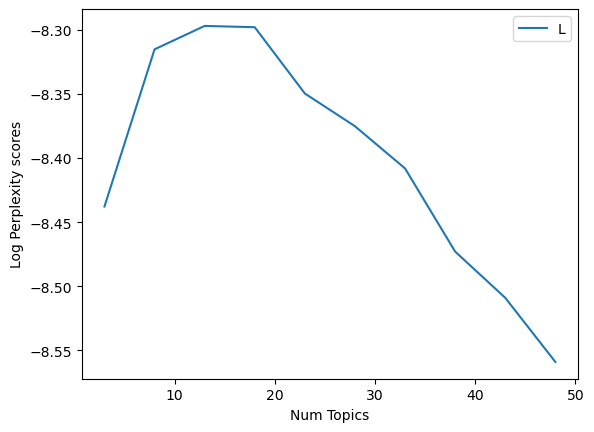

In [ ]:
x = range(start1, limit1, step1)
plt.plot(x, perplexity_scores)
plt.xlabel("Num Topics")
plt.ylabel("Log Perplexity scores")
plt.legend(("Log Perplexity"), loc='best')
plt.show()

위는 불안정한 형태임.

### Coherence 계산하기

In [ ]:
from gensim.models import CoherenceModel

In [ ]:
def compute_coherence_values_umass(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                        id2word=dictionary, alpha='auto', eta='auto')
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary,
                                        coherence='u_mass', topn=30)
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

In [ ]:
start1 = 3
limit1 = 63
step1 = 3
coherence_values_umass = compute_coherence_values_umass(dictionary=dictionary, corpus=DTM, texts=docs_filtered, start=start1, limit=limit1, step=step1)

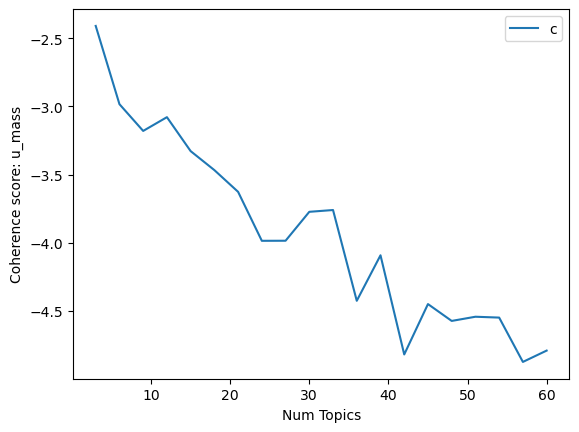

In [ ]:
x = range(start1, limit1, step1)
plt.plot(x, coherence_values_umass)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score: u_mass")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
def compute_coherence_values_cv(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                        id2word=dictionary, alpha='auto', eta='auto')
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary,
                                        coherence='c_v', topn=20)
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

In [ ]:
coherence_values_cv = compute_coherence_values_cv(dictionary=dictionary, corpus=DTM, texts=docs_filtered, start=start1, limit=limit1, step=step1)

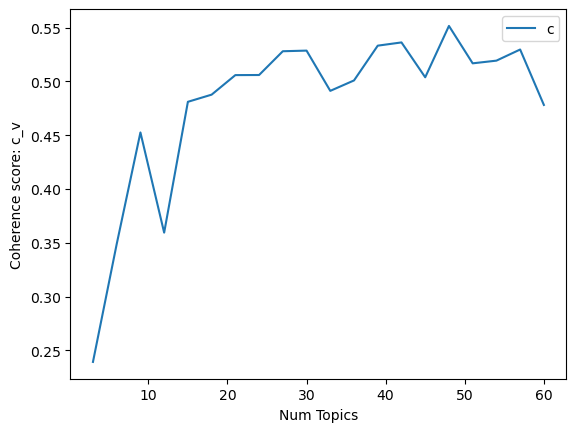

In [ ]:
x = range(start1, limit1, step1)
plt.plot(x, coherence_values_cv)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score: c_v")
plt.legend(("coherence_values"), loc='best')
plt.show()

# pyLDAvis를 이용해서 시각화해 보기

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [ ]:
prepared_data = gensimvis.prepare(lda_model, DTM, dictionary)

In [ ]:
pyLDAvis.display(prepared_data)

In [ ]:
pyLDAvis.save_html(prepared_data, 'LDAvis.html')

시각화 결과물을  html 파일로 저장 가능. 시각화 결과물을 어떻게 해석할 수 있는지 html파일로 확인 가능.

이렇게 정렬하는 방식의 단점

- 특정 주제들이 아닌 다른 주제로 관련이 높은 단어들이 rank 될 수 있음.
- 단어의 정보를 파악해야 한다.

중복이 되는 주제들이 많게끔 해석이 될 수 있다.

특정한 주제로만 관련이 되는 단어들이 상위에 랭크되게끔 하면 된다.

상단에 람다라고 하는 값을 줄여주면 된다. 그러면 특정 주제하고만 관련이 높은 단어들이 상위에 랭크 된다. 그러한 단어들의 정보들을 파악해서 해당 주제가 무엇에 대한 것인지 파악할 수 있다.

람다에 대해서는 논문 참고. 람다에 대해서는 0.5 혹은 0.6 값을 추천함.

특정 주제에 대한 단어가 무엇인지 파악하고, 그 단어들을 바탕으로 주제를 결정 혹은 해석.
